In [1]:
import import_ipynb

import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline

from eunjeon import Mecab; mecab = Mecab()
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

import matplotlib as mpl
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def text_process(contents):
    file = open('./dataset/stopwords.txt', 'r', encoding='UTF8')
    STOPWORDS = file.read().split(', ')
    file.close()
    
    file = open('./dataset/gongju/min30.txt', 'r', encoding='utf-8')
    MINWORDS = file.read().split(',')
    file.close()
    
    content_list = [content for content in contents]
    
    content_text = ''.join(content_list)
    
    noun_list = mecab.nouns(content_text)
    
    noun_list = [x for x in noun_list if len(x)>=2]
    
    for i in range(len(noun_list)):
        if(noun_list[i]=='충남'):
            noun_list[i] = '충청남도'
        if(noun_list[i]=='공주'):
            noun_list[i] = '공주시'
        
    noun_list = [word for word in noun_list if word in MINWORDS]
        
    return ' '.join([word for word in noun_list if word not in STOPWORDS])

In [3]:
def getRankListFromSeries(s):
    clean_list = s.to_list()

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(clean_list)

    terms = tfidf_vectorizer.get_feature_names()

    sums = tfidf_matrix.sum(axis=0)

    data = []
    for idx, term in enumerate(terms):
           data.append( (term, sums[0, idx] ))

    ranking_df = pd.DataFrame(data, columns=['term','rank'])
    ranking_df.sort_values('rank',inplace=True, ascending=False)
    
    return tolist(ranking_df)

In [4]:
def tolist(df):
    return [tuple(r) for r in df.to_numpy()]

----------------------------------------------------------------------------------------

In [5]:
data_df = pd.read_excel("./dataset/gongju/naverview_gongju.xlsx", engine="openpyxl")
data_df.head()

,title,nickname,datetime,content
0,유구한 세월의 발자취 - 공주시 유구터미널,모리노\n(goyasoul88),2008. 10. 1. 2:19,석남리\n충청남도 > 공주시 > 유구읍\n기간 2008.9.21 ~ 2008.9.2...
1,공주시 ‘꿈의 교회’ 프로젝트 지역사회 감동 줘,오동균\n(odk1956),2006. 3. 21. 22:59,공주시 ‘꿈의 교회’ 프로젝트 지역사회 감동 줘\n 함께하면 풍성해지는 40일 캠...
2,공주시 산림박물관 견학,하이데스\n(pygmalion999),2007. 12. 27. 15:06,산림박물관이 있는줄 얼마전에 알았다..\n어떤것이 전시되어 있는지 궁금하기도 하...
3,찬란한 백제문화를 꽃피운 공주시가와 금강줄기가 산아래 내려다 보이는,청람\n(khrnice),2006. 9. 11. 21:16,이제 완연한 가을 날씨다..\n좀처럼 한 곳에 머물기를 죽도록 싫어하는 성격이 이렇...
4,충남 기도터-충남 공주시 사곡면 벽계산 약수암 기도터,찬누리\n(jinsug9339),2007. 3. 7. 20:54,충남 공주시 사곡면 벽계산 약수암 기도터\n(위)-벽계산 약수암 기도터 주차장과 요...


### Preprocess

In [6]:
data_df['title'] = data_df['title'].astype('str')
data_df['content'] = data_df['content'].astype('str')

In [7]:
data_df['clean_title'] = data_df.title.apply(text_process)
data_df['clean_content'] = data_df['clean_title'] + " " + data_df.content.apply(text_process)

In [8]:
data_df.head()

,title,nickname,datetime,content,clean_title,clean_content
0,유구한 세월의 발자취 - 공주시 유구터미널,모리노\n(goyasoul88),2008. 10. 1. 2:19,석남리\n충청남도 > 공주시 > 유구읍\n기간 2008.9.21 ~ 2008.9.2...,세월 발자취 공주시 유구 터미널,세월 발자취 공주시 유구 터미널 충청남도 공주시 유구읍 기간 컨셉 사진 여행 경로 ...
1,공주시 ‘꿈의 교회’ 프로젝트 지역사회 감동 줘,오동균\n(odk1956),2006. 3. 21. 22:59,공주시 ‘꿈의 교회’ 프로젝트 지역사회 감동 줘\n 함께하면 풍성해지는 40일 캠...,공주시 교회 프로젝트 사회 감동,공주시 교회 프로젝트 사회 감동 공주시 교회 프로젝트 사회 감동 캠페인 전개 공주시...
2,공주시 산림박물관 견학,하이데스\n(pygmalion999),2007. 12. 27. 15:06,산림박물관이 있는줄 얼마전에 알았다..\n어떤것이 전시되어 있는지 궁금하기도 하...,공주시 산림 박물관 견학,공주시 산림 박물관 견학 산림 박물관 전시 자연환경 견학 공주시 금강 자연 휴양림 ...
3,찬란한 백제문화를 꽃피운 공주시가와 금강줄기가 산아래 내려다 보이는,청람\n(khrnice),2006. 9. 11. 21:16,이제 완연한 가을 날씨다..\n좀처럼 한 곳에 머물기를 죽도록 싫어하는 성격이 이렇...,백제 문화 공주시 시가 금강 줄기,백제 문화 공주시 시가 금강 줄기 가을 날씨 성격 오후 한참 공주시 궁중 칼국수 아...
4,충남 기도터-충남 공주시 사곡면 벽계산 약수암 기도터,찬누리\n(jinsug9339),2007. 3. 7. 20:54,충남 공주시 사곡면 벽계산 약수암 기도터\n(위)-벽계산 약수암 기도터 주차장과 요...,충청남도 충청남도 공주시 사곡면 계산,충청남도 충청남도 공주시 사곡면 계산 충청남도 공주시 사곡면 계산 계산 주차장 요사...


### Word2vec

In [9]:
content_noun_list = []

for i in range(len(data_df)):
    content_noun_list.append(data_df['clean_content'][i])

content_str = ' '.join([word for word in content_noun_list]).split()

In [10]:
model = Word2Vec([content_str], vector_size=300, window=10, min_count=1, workers=4, sg=1, epochs=20)

In [11]:
word_list = [word[0] for word in getRankListFromSeries(data_df['clean_content'])[:100]] #tf-idf

In [12]:
my_dict = dict({})

for idx, key in enumerate(word_list):
    my_dict[key] = model.wv[key]

In [13]:
wordvectors_df = pd.DataFrame(my_dict).transpose()
wordvectors_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
공주시,-0.181343,0.165556,0.322387,-0.021055,0.011673,0.003838,0.203546,0.238981,-0.105216,-0.008705,0.043739,-0.128066,0.017274,0.266165,-0.325362,-0.115545,-0.068801,-0.254477,-0.119438,-0.217731,-0.124320,0.216549,0.263115,-0.032193,0.494189,0.011380,-0.202845,0.007644,-0.093513,-0.070599,-0.175099,0.016716,0.312766,0.035051,-0.107081,-0.008935,0.149849,-0.288730,-0.263618,-0.073366,-0.397351,0.102937,-0.194236,-0.143130,0.175400,-0.122447,0.053890,0.288348,-0.078968,0.281332,...,-0.086894,-0.186002,-0.037072,-0.129796,-0.160927,-0.218599,0.022227,-0.020364,-0.463854,0.005869,-0.109952,0.219201,0.005141,-0.296407,-0.221638,0.002723,0.141479,0.228428,-0.390193,-0.016220,0.308908,0.067276,0.172663,-0.348060,0.013094,-0.094026,0.257616,-0.019830,-0.249854,-0.289044,0.387425,-0.341271,-0.097916,0.123145,0.116751,-0.051103,-0.049020,-0.084625,-0.064957,0.003434,-0.193638,0.194141,0.216856,-0.081264,-0.114113,-0.040636,0.147168,-0.014078,0.237627,-0.050989
충청남도,-0.195282,0.165912,0.439760,-0.071992,0.043928,0.040207,0.306264,0.406780,-0.100273,-0.010192,0.032880,-0.211995,0.057400,0.178266,-0.233054,-0.129688,-0.157986,-0.256265,-0.014194,-0.030900,-0.148555,0.156101,0.141136,0.340686,0.164707,0.185486,-0.076883,-0.032332,-0.150205,-0.061461,-0.296615,0.142126,0.067038,-0.101592,-0.161896,-0.076202,0.401985,-0.274987,-0.151516,0.089918,-0.246956,0.206438,-0.137864,-0.135516,0.152306,-0.150827,-0.123881,0.126776,-0.001739,0.225722,...,0.127855,-0.119851,0.007792,0.003529,0.040059,0.004869,0.020255,-0.265485,-0.369840,-0.162937,0.097656,0.122228,0.068462,-0.306638,-0.033655,-0.014527,0.067035,0.289150,-0.342680,-0.058035,0.284272,0.100554,0.092023,-0.061284,0.009963,-0.204807,0.279827,-0.077182,-0.300480,-0.281274,0.241809,-0.191262,-0.209460,-0.062988,-0.101763,0.007571,-0.004864,-0.068014,-0.037811,0.058013,-0.130047,0.238132,0.275393,-0.124135,-0.023242,0.068546,0.281675,-0.177047,0.264994,0.008077
사업,-0.155122,0.019421,0.497276,0.048367,0.069514,0.104607,0.302978,0.119462,0.200457,-0.004320,-0.002435,-0.348435,0.011792,0.375802,-0.281657,0.038843,-0.034831,-0.078464,0.243022,-0.406927,-0.037591,0.153784,0.340163,0.042098,0.382499,-0.165902,-0.321940,0.005559,-0.065189,-0.306765,0.243483,-0.045469,0.317585,0.300924,-0.289567,-0.272160,0.024961,-0.601291,-0.106948,0.026465,-0.146120,0.050877,-0.081646,-0.349965,0.308896,0.119016,0.055631,0.438044,-0.312405,0.096256,...,-0.204490,0.127484,0.054879,-0.046790,-0.562476,-0.470469,0.289728,0.036341,-0.328476,-0.002144,-0.192312,0.110729,0.188089,-0.459805,-0.480670,-0.054640,0.042903,0.296430,-0.410661,0.089460,0.228616,0.071295,0.314009,-0.399296,-0.116890,-0.182914,-0.059173,-0.259903,-0.283419,-0.354226,0.437489,-0.306416,-0.196339,0.394902,0.226269,-0.357887,-0.104502,-0.224162,0.236997,0.180382,-0.234127,0.489570,0.239773,0.058113,-0.008212,0.238688,0.085593,0.187719,0.376007,-0.161483
문화,-0.310152,-0.021994,0.370839,-0.196242,0.033018,-0.025692,0.079611,0.056223,-0.006196,0.047856,-0.047464,-0.306858,0.023309,0.202590,-0.001387,-0.126702,0.057638,-0.342302,0.111537,-0.138078,0.166566,-0.073328,0.158807,-0.011573,0.214440,-0.141428,-0.185344,0.161793,-0.232689,-0.085304,0.004020,-0.097403,0.206246,0.140495,-0.072053,-0.058535,0.229931,-0.239539,-0.124055,0.081926,-0.124873,0.203344,-0.270788,0.004630,0.074579,0.113957,0.235578,0.475601,-0.185006,0.187876,...,-0.182512,-0.237705,0.347928,0.019622,-0.173225,-0.315909,0.200350,0.041439,-0.357503,0.178787,-0.136571,0.102618,0.183710,-0.341068,-0.228552,-0.128676,0.168735,0.149872,-0.305827,-0.288004,-0.030966,-0.018207,-0.007809,-0.206093,0.029462,0.010958,0.273609,-0.019060,-0.273619,-0.459918,0.0

### Cosine similarity

In [14]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [15]:
count_dict = {}

for i in tqdm(range(len(wordvectors_df))):
    for j in range(i+1, len(wordvectors_df)):
        cossim = cosine_similarity(wordvectors_df.iloc[i, :].values, wordvectors_df.iloc[j, :].values)
        count_dict[wordvectors_df.iloc[i, :].name, wordvectors_df.iloc[j, :].name] = cossim

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.56it/s]


In [16]:
count_dict

{('공주시', '충청남도'): 0.7454554,
 ('공주시', '사업'): 0.694697,
 ('공주시', '문화'): 0.6102813,
 ('공주시', '시민'): 0.67115223,
 ('공주시', '도시'): 0.6516665,
 ('공주시', '체험'): 0.61359656,
 ('공주시', '마을'): 0.56504524,
 ('공주시', '사진'): 0.72242755,
 ('공주시', '교육'): 0.64682966,
 ('공주시', '백제'): 0.44593003,
 ('공주시', '토지'): 0.63411415,
 ('공주시', '시장'): 0.711472,
 ('공주시', '행사'): 0.6750238,
 ('공주시', '행정'): 0.6124953,
 ('공주시', '주택'): 0.54480475,
 ('공주시', '계룡산'): 0.6430841,
 ('공주시', '계획'): 0.6589385,
 ('공주시', '공산'): 0.5790213,
 ('공주시', '카페'): 0.085044734,
 ('공주시', '수도'): 0.7738604,
 ('공주시', '안전'): 0.5757639,
 ('공주시', '마곡사'): 0.7218463,
 ('공주시', '축제'): 0.62278724,
 ('공주시', '맛집'): 0.048873026,
 ('공주시', '대전'): 0.7234163,
 ('공주시', '주민'): 0.5236727,
 ('공주시', '금강'): 0.5834246,
 ('공주시', '공원'): 0.72084653,
 ('공주시', '활동'): 0.6039026,
 ('공주시', '관광'): 0.57876444,
 ('공주시', '갑사'): 0.4523434,
 ('공주시', '박물관'): 0.4933561,
 ('공주시', '기자'): 0.84067446,
 ('공주시', '관리'): 0.5906108,
 ('공주시', '복지'): 0.6305981,
 ('공주시', '참여'): 0.614594,
 ('공주시', '

### Save

In [17]:
count_list = []

for row in count_dict:
    count_list.append([row[0], row[1], count_dict[row]])

In [18]:
sim_df = pd.DataFrame(count_list, columns=['word1', 'word2', 'cos_sim'])
sim_df = sim_df.sort_values(by=['cos_sim'], ascending=False)
sim_df = sim_df.reset_index(drop=True)

sim_df.to_csv('./dataset/gongju/graph_cosine_similarity.csv', encoding='euc-kr')
sim_df.head()

,word1,word2,cos_sim
0,아파트,민원,0.967926
1,복지,사회,0.951895
2,개발,가능,0.951862
3,사용,아파트,0.947903
4,사용,자전거,0.947022


# Graph Clustering

In [5]:
import operator

import networkx as nx
import community as community_louvain

import matplotlib.cm as cm
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm._rebuild()
font_fname = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_fname).get_name()

In [6]:
cossim_df = pd.read_csv('./dataset/gongju/eng_graph_cosine_similarity.csv', encoding='euc-kr')
org_cossim_df = cossim_df.copy()

cossim_df['cos_sim'] = org_cossim_df['cos_sim']
cossim_df = cossim_df.dropna()
cossim_df.head()

,Unnamed: 0,word1,word2,cos_sim
0,0,Apartment,Civil complaint,0.967926
1,1,Welfare,Society,0.951895
2,2,Development,possibility,0.951862
3,3,Use,Apartment,0.947903
4,4,Use,Bicycle,0.947022


100%|███████████████████████████████████████████████████████████████████████████| 1460/1460 [00:00<00:00, 48667.10it/s]


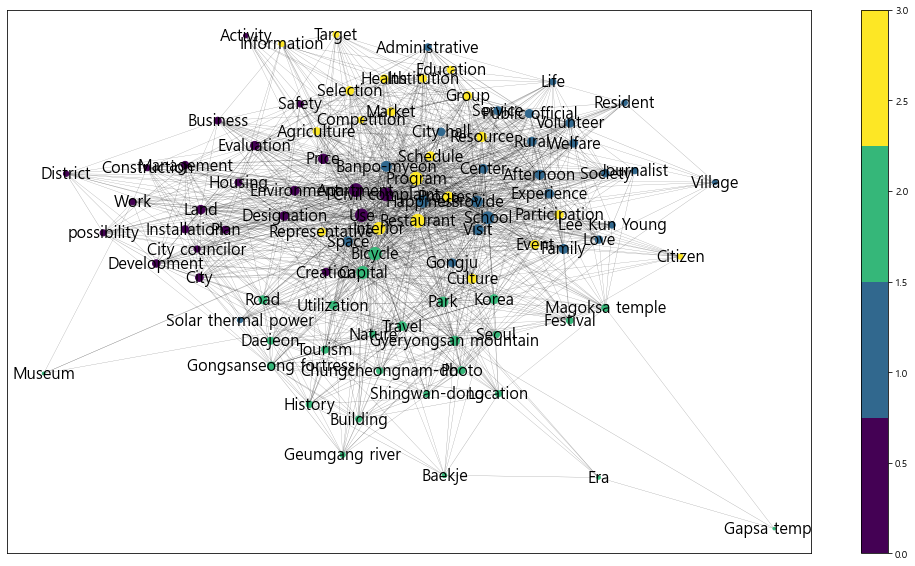

커뮤니티 1 
 ['Apartment', 'Civil complaint', 'Development', 'possibility', 'Use', 'Land', 'Price', 'Construction', 'Management', 'Creation', 'Evaluation', 'City', 'Designation', 'Work', 'Installation', 'Plan', 'Safety', 'Business', 'Housing', 'Environment', 'District', 'City councilor', 'Activity'] 

커뮤니티 2 
 ['Welfare', 'Society', 'Service', 'School', 'Happiness', 'Banpo-myeon', 'Space', 'Family', 'Provide', 'Experience', 'Journalist', 'Lee Kun Young', 'City hall', 'Visit', 'Center', 'Rural', 'Love', 'Gongju', 'Afternoon', 'Public official', 'Volunteer', 'Resident', 'Administrative', 'Village', 'Life', 'Solar thermal power'] 

커뮤니티 3 
 ['Bicycle', 'Capital', 'Gongsanseong fortress', 'Geumgang river', 'Gyeryongsan mountain', 'Building', 'Road', 'Travel', 'Photo', 'Festival', 'Utilization', 'Korea', 'Park', 'Daejeon', 'Location', 'Baekje', 'History', 'Nature', 'Tourism', 'Shingwan-dong', 'Chungcheongnam-do', 'Magoksa temple', 'Era', 'Seoul', 'Gapsa temple', 'Museum'] 

커뮤니티 4 
 ['Restauran

In [10]:
threshold = 0.69

G = nx.Graph()

for idx in tqdm(range((len(np.where(cossim_df['cos_sim'] >= threshold)[0])))):
    G.add_edge(cossim_df['word1'][idx], cossim_df['word2'][idx], weight=cossim_df['cos_sim'][idx])

dgr = nx.degree_centrality(G)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)

for idx in range(len(sorted_dgr)):
    G.add_node(sorted_dgr[idx][0], nodesize=sorted_dgr[idx][1])

partition = community_louvain.best_partition(G, random_state=16)

pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

"""
Visualization
"""
fig = plt.figure(figsize=(18,10))

sizes = [G.nodes[node]['nodesize'] * 200 for node in G] # 노드사이즈
edge_wts = [0.3 * edge[2] for edge in G.edges(data = 'weight')] # 엣지사이즈

im = nx.draw_networkx_nodes(G, pos, cmap=cmap, node_size=sizes, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_wts)
nx.draw_networkx_labels(G, pos, font_size=16, font_color="BLACK", font_family=fontprop)

plt.savefig('./dataset/gongju/image/gongjugraph.png')

plt.colorbar(im)
plt.show(block=False)

# Print
count = 0    
node_count = 0
nodes_list = []
strdata = ''
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    node_count = node_count + len(list_nodes)
    nodes_list.append(list_nodes)
    strdata = strdata + '\n커뮤니티' + str(int(count)) + '\n'

    for s in list_nodes:        
        strdata = strdata + s + " "

    print('커뮤니티', int(count), '\n',list_nodes, '\n')

print('노드 수 : ', node_count)
